In [1]:
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1008. InVitroWildfire EVProteomics V2/P1008.3. Analyses/P1008.3.1. Data Processing/Output')
cur_date = "082322"

library(readxl)
library(tidyverse)
library(imputeLCMD)
library(factoextra)
library(vegan)
library(preprocessCore)


#reading in files
identifiers_df = data.frame(read_excel("Input/Identifiers_030422.xlsx"))
set1_proteome_df = data.frame(read_excel("Input/PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 1))[,c(1,6,22:35)]
set2_proteome_df = data.frame(read_excel("Input/PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 2))[,c(1,6,22:35)]

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: tmvtnorm

Loading required package: mvtnorm

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: stats4

Loading required package: gmm

Loading required package: sandwich

Loading required package: norm

Loading required package: pcaMethods

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following o

In [2]:
# creating 1 proteome df for dataverse export
# set1_proteome_df = data.frame(read_excel("Input/PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 1)) %>%
#     pivot_longer(cols = 8:35, names_to = "IDs_from_Core", values_to = "Value")

# set2_proteome_df = data.frame(read_excel("Input/PC927-Rager_LFQProteome_Results_RawValues_R ready.xlsx", sheet = 2)) %>%
#     pivot_longer(cols = 8:35, names_to = "IDs_from_Core", values_to = "Value")

# a = rbind(set1_proteome_df, set2_proteome_df) %>%
#     rename(Protein = Accession)

# b = inner_join(a, identifiers_df)
# c = b %>%
#     select(-IDs_from_Core) %>%
#     rename(ID = Our_Analysis_ID, Unique_Peptides = Number_of_UniquePeptides) %>%
#     #creating a col that denotes the general treatment to remove proteins within those treatment groups
#     mutate(Treatment = ifelse(grepl("CoCulture_PooledSample", ID), "CoCulture_PooledSample",
#                              ifelse(grepl("CoCulture_Vehicle", ID), "CoCulture_Vehicle",
#                                    ifelse(grepl("CoCulture_Exposed", ID), "CoCulture_Exposed",
#                                          ifelse(grepl("TriCulture_PooledSample", ID), "TriCulture_PooledSample",
#                                              ifelse(grepl("TriCulture_Vehicle", ID), "TriCulture_Vehicle",
#                                                    ifelse(grepl("TriCulture_Exposed", ID), "TriCulture_Exposed",
                                         
#                                          NA))))))) %>%
#     # removing pooled samples and exposed samples since they're not needed for analysis
#     filter(!grepl("PooledSample", Treatment)) %>%
#     filter(!grepl("Exposed", Treatment)) %>%
#     select(-c("Set", "Treatment"))

# d = c %>%
#     pivot_wider(names_from = "ID", values_from = "Value")

# head(d)

In [3]:
# exporting results
# write.csv(d, paste0(Output,"/", cur_date, "_Extracellular_Vesicles_Proteome_Raw_Values.csv"), row.names = FALSE)

In [4]:
head(identifiers_df)
head(set1_proteome_df)
head(set2_proteome_df)

,IDs_from_Core,Our_Analysis_ID,Set
,<chr>,<chr>,<chr>
1,Abundance..Pooled.1,CoCulture_PooledSample1,Set1
2,Abundance..Pooled.2,CoCulture_PooledSample2,Set1
3,Abundance..1..Vehicle,CoCulture_VehicleCT1,Set1
4,Abundance..3..Vehicle,CoCulture_VehicleCT2,Set1
5,Abundance..5..Vehicle,CoCulture_VehicleCT3,Set1
6,Abundance..7..Vehicle,CoCulture_VehicleCT4,Set1


,Accession,Number_of_UniquePeptides,Abundance..Pooled.1,Abundance..Pooled.2,Abundance..1..Vehicle,Abundance..3..Vehicle,Abundance..5..Vehicle,Abundance..7..Vehicle,Abundance..9..Vehicle,Abundance..11..Vehicle,Abundance..2..Wood.Smoke,Abundance..4..Wood.Smoke,Abundance..6..Wood.Smoke,Abundance..8..Wood.Smoke,Abundance..10..Wood.Smoke,Abundance..12..Wood.Smoke
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P02769,99,4.89e+11,4.43e+11,6.26e+11,4.38e+11,4.74e+11,3.40e+11,4.94e+11,4.85e+11,4.54e+11,6.23e+11,7.37e+11,5.13e+11,3.96e+11,6.86e+11
2,P02751,201,2.73e+11,2.41e+11,2.24e+11,2.43e+11,3.24e+11,2.53e+11,2.45e+11,1.35e+11,1.68e+11,2.37e+11,2.98e+11,2.54e+11,1.97e+11,2.50e+11
3,P12763,34,2.63e+11,2.29e+11,3.10e+11,2.33e+11,2.70e+11,2.42e+11,2.71e+11,2.50e+11,2.67e+11,2.86e+11,3.27e+11,2.63e+11,2.52e+11,3.03e+11
4,Q2UVX4,162,5.65e+10,5.15e+10,6.76e+10,4.31e+10,4.09e+10,4.12e+10,4.92e+10,3.53e+10,4.76e+10,4.01e+10,3.68e+10,6.53e+10,4.45e+10,4.69e+10
5,P98160,210,2.27e+10,2.04e+10,3.01e+10,1.79e+10,1.40e+10,2.64e+10,2.81e+10,2.85e+10,1.97e+10,1.40e+10,1.30e+10,2.19e+10,2.46e+10,2.27e+10
6,P12111,201,2.15e+10,2.03e+10,1.55e+10,2.12e+10,2.29e+10,1.99e+10,2.00e+10,9.49e+09,1.67e+10,2.09e+10,2.67e+10,2.63e+10,2.06e+10,2.60e+10


,Accession,Number_of_UniquePeptides,Abundance..Pooled.1,Abundance..Pooled.2,Abundance..13..Vehicle,Abundance..15..Vehicle,Abundance..17..Vehicle,Abundance..19..Vehicle,Abundance..21..Vehicle,Abundance..23..Vehicle,Abundance..14..Wood.Smoke,Abundance..16..Wood.Smoke,Abundance..18..Wood.Smoke,Abundance..20..Wood.Smoke,Abundance..22..Wood.Smoke,Abundance..24..Wood.Smoke
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P02751,193,197908273327,215449909749,290377149672,237808533258,300713328573,246820946145,304313034954,264966884310,243333335207,199860505414,279706283336,225170612912,229939459846,154501914723
2,P02769,97,342657042076,370488835120,308967859550,242917660277,278096520636,259674859546,291397652436,563821412595,281882492897,732144132018,248045691869,233383724786,349312465553,251094645011
3,P07996,34,64580519826,73778236233,181775619913,129485605438,169377550217,134685992120,114143664541,249366551496,132714564698,128084639698,112262919453,111419806864,73857936963,108923410421
4,Q2UVX4,160,41255020284,45525199756,55681501380,35618922477,44222632333,47245712210,44043324866,75943777589,53160804546,68298716794,48638631002,47654755526,35704911241,52145684636
5,P98160,207,16164372416,18035124503,20257643320,13577050138,17442737821,24582420164,20491703047,36081485773,20355674908,16277580495,15654918570,19579785521,16823558423,20030021253
6,P12763,32,180364995691,186934859645,159857253388,143580491033,158608208515,140452510019,145834623969,220324446614,137520441019,237042125375,156248949606,124984210103,171103871588,143324724008


In [5]:
# creating 1 proteome df
set1_proteome_df = set1_proteome_df %>%
    pivot_longer(cols = 3:16, names_to = "IDs_from_Core", values_to = "Value") %>%
    mutate(Set = c("Set1"))

set2_proteome_df = set2_proteome_df %>%
    pivot_longer(cols = 3:16, names_to = "IDs_from_Core", values_to = "Value") %>%
    mutate(Set = c("Set2"))

proteome_df = rbind(set1_proteome_df, set2_proteome_df) %>%
    rename(Protein = Accession)
head(proteome_df)

Protein,Number_of_UniquePeptides,IDs_from_Core,Value,Set
<chr>,<dbl>,<chr>,<dbl>,<chr>
P02769,99,Abundance..Pooled.1,4.89e+11,Set1
P02769,99,Abundance..Pooled.2,4.43e+11,Set1
P02769,99,Abundance..1..Vehicle,6.26e+11,Set1
P02769,99,Abundance..3..Vehicle,4.38e+11,Set1
P02769,99,Abundance..5..Vehicle,4.74e+11,Set1
P02769,99,Abundance..7..Vehicle,3.40e+11,Set1


In [6]:
#adding in our own ids
proteome_df = inner_join(identifiers_df, proteome_df) %>%
    select(-IDs_from_Core) %>%
    rename(ID = Our_Analysis_ID, Unique_Peptides = Number_of_UniquePeptides) %>%
    #creating a col that denotes the general treatment to remove proteins within those treatment groups
    mutate(Treatment = ifelse(grepl("CoCulture_PooledSample", ID), "CoCulture_PooledSample",
                             ifelse(grepl("CoCulture_Vehicle", ID), "CoCulture_Vehicle",
                                   ifelse(grepl("CoCulture_Exposed", ID), "CoCulture_Exposed",
                                         ifelse(grepl("TriCulture_PooledSample", ID), "TriCulture_PooledSample",
                                             ifelse(grepl("TriCulture_Vehicle", ID), "TriCulture_Vehicle",
                                                   ifelse(grepl("TriCulture_Exposed", ID), "TriCulture_Exposed",
                                         
                                         NA))))))) %>%
    # removing pooled samples and exposed samples since they're not needed for analysis
    filter(!grepl("PooledSample", Treatment)) %>%
    filter(!grepl("Exposed", Treatment))

head(proteome_df)

Joining, by = c("IDs_from_Core", "Set")


,ID,Set,Protein,Unique_Peptides,Value,Treatment
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle
2,CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle
3,CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle
4,CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle
5,CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle
6,CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle


In [7]:
# intial number of proteins prior to filtering
length(unique(proteome_df$Protein))

[1] 2167

# 1. Peptide Normalization

Normalize to total amount of peptide per sample: sum the abundance values for each sample, then calculate the median value across all of the summed abundance values, and calculate the ratio

In [8]:
# set 1 = coculture, set 2 = triculture
normalized_df = proteome_df %>%
    group_by(ID) %>%
    #removing missing data
    drop_na() %>%
    mutate(Summed_Value = sum(Value)) %>%
    #calculating median across all samples but still within each set
    ungroup() %>%
    mutate(Median_of_Sum = median(Summed_Value), Norm_Factor = Summed_Value/ Median_of_Sum, 
           Norm_Value = Value/Norm_Factor) %>%
    select(-c("Summed_Value", "Median_of_Sum", "Norm_Factor"))
head(normalized_df)

ID,Set,Protein,Unique_Peptides,Value,Treatment,Norm_Value
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle,538898561927
CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle,192832712255
CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle,266866699996
CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle,58194157806
CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle,25911895709
CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle,13343335000


# 2. Detection Filter - Round 1

Round 1 - Unable to replicate the 1% peptide/ 5% protein FDR, so we'll just retain proteins that were identified by at least 2 peptides.

In [9]:
# only keeping proteins > 2 unique proteins
detection_filter_1_df = proteome_df %>%
    filter(Unique_Peptides > 2)

detection_filter_1_df %>%
    group_by(Set) %>%
    summarize(`Remaining Proteins` = length(unique(Protein)))

Set,Remaining Proteins
<chr>,<int>
Set1,1024
Set2,1382


# 3. Detection Filter - Round 2

Round 2 - Filter rows based on valid values: 50 % valid in either culture or set (i.e. proteins with values observed in fewer than 50% of replicates (here, 3 reps) in at least 1 condition were eliminated from the dataset) 

In [10]:
protein_presence_df = detection_filter_1_df %>%
    # creating 2 count cols: 1st for non-missing data, 2nd for all data
    mutate(data_count = ifelse(is.na(Value), 0, 1), all_count = 1) %>%
    group_by(Protein) %>%
    summarize(Protein_Presence = sum(data_count)/ sum(all_count) * 100) %>%
    filter(Protein_Presence < 50) %>%
    arrange(Protein_Presence) 

head(protein_presence_df)

# getting the proteins in the entire set that will be removed
removed_proteins_df = protein_presence_df %>%
    ungroup() %>%
    select(-Protein_Presence) %>% 
    unique()

# number of proteins removed from each set for the 2nd detection filter
removed_proteins_df %>%
    summarize(`Removed Proteins` = length(unique(Protein)))

Protein,Protein_Presence
<chr>,<dbl>
P23497,16.66667
Q14435,16.66667
P05109,33.33333
P42025,33.33333
Q52LG2,33.33333
Q8TF66,33.33333


Removed Proteins
<int>
8


In [11]:
# removing those 8 proteins from the entire dataset 
# finding proteins that exist only in the proteome_df but not the removed proteins_df
detection_filter_2_df = anti_join(detection_filter_1_df, removed_proteins_df)
head(detection_filter_2_df)

# number of proteins kept
detection_filter_2_df %>%
    group_by(Treatment) %>%
    summarize(`Kept Proteins` = length(unique(Protein)))

Joining, by = "Protein"


,ID,Set,Protein,Unique_Peptides,Value,Treatment
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle
2,CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle
3,CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle
4,CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle
5,CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle
6,CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle


Treatment,Kept Proteins
<chr>,<int>
CoCulture_Vehicle,1020
TriCulture_Vehicle,1377


In [12]:
# determining what proteins are present in one or both culture groups
detection_filter_2_df = detection_filter_2_df %>%
    group_by(Protein) %>%
    mutate(Treatment_Presence = ifelse(length(Protein) == 12, "Both", "Tri or Co")) %>%
    mutate(Treatment_Presence = ifelse(Treatment_Presence == "Tri or Co" & Treatment == "CoCulture_Vehicle", "CoCulture",
                                      ifelse(Treatment_Presence == "Tri or Co" & Treatment == "TriCulture_Vehicle", "TriCulture",
                                          Treatment_Presence))) %>%
    ungroup(Protein) 

head(detection_filter_2_df) 

ID,Set,Protein,Unique_Peptides,Value,Treatment,Treatment_Presence
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
CoCulture_VehicleCT1,Set1,P02769,99,6.26e+11,CoCulture_Vehicle,Both
CoCulture_VehicleCT1,Set1,P02751,201,2.24e+11,CoCulture_Vehicle,Both
CoCulture_VehicleCT1,Set1,P12763,34,3.10e+11,CoCulture_Vehicle,Both
CoCulture_VehicleCT1,Set1,Q2UVX4,162,6.76e+10,CoCulture_Vehicle,Both
CoCulture_VehicleCT1,Set1,P98160,210,3.01e+10,CoCulture_Vehicle,Both
CoCulture_VehicleCT1,Set1,P12111,201,1.55e+10,CoCulture_Vehicle,Both


In [13]:
# verifying count of proteins present
detection_filter_2_df %>%
    count(Treatment_Presence)

444/6
2586/6

Treatment_Presence,n
<chr>,<int>
Both,11352
CoCulture,444
TriCulture,2586


[1] 74

[1] 431

This means that there were 74 proteins only present in coculture and 431 only detected in triculture.

# 4. Log2 Transformation

Did this step later in the imputation function. 

# 5. QRILC Imputation

QRILC replaces data with left-censored data from a Gaussian distribution. 

In [14]:
# adding in normalized values to the filtered df
# left join returns all the records from the first table along with matching records from the second
detection_filter_normalized_df = left_join(detection_filter_2_df, normalized_df) %>% 
                       select(-Unique_Peptides)

preimputed_df = detection_filter_normalized_df[, c(1,2,5,3,4,7,6)]
#preimputed_df = detection_filter_normalized_df[, c(1,2,5,3,4,6)]
head(preimputed_df)

Joining, by = c("ID", "Set", "Protein", "Unique_Peptides", "Value",
"Treatment")


ID,Set,Treatment,Protein,Value,Norm_Value,Treatment_Presence
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P02769,6.26e+11,538898561927,Both
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P02751,2.24e+11,192832712255,Both
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P12763,3.10e+11,266866699996,Both
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,Q2UVX4,6.76e+10,58194157806,Both
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P98160,3.01e+10,25911895709,Both
CoCulture_VehicleCT1,Set1,CoCulture_Vehicle,P12111,1.55e+10,13343335000,Both


In [15]:
# QRILC
QRILC_imputation = function(dataset){
    # """
    # Creating a quantile normalization function to normalize each sample.
    # :param (input): exposed and unexposed (vehicle) dfs
    # :output: 1 quantile normalized df
    # """
    wider_dataset = dataset %>%
        select(-c("Set", "Value", "Treatment", "Treatment_Presence")) %>%
        pivot_wider(names_from = Protein, values_from = Norm_Value) 
    
    # normalizing data since that's what the QRILC function wants
    QRILC_prep = wider_dataset[,2:dim(wider_dataset)[2]] %>%
         mutate_all(., function(x) log2(x)) %>%
         as.matrix()

    imputed_QRILC_object = impute.QRILC(QRILC_prep, tune.sigma = 0.1)
    QRILC_log2_df = data.frame(imputed_QRILC_object[1]) 
    
    # converting back the original scale
    QRILC_df = QRILC_log2_df %>%
        mutate_all(., function(x) 2^x - 1)
    
    # adding back in ID col
    QRILC_df = cbind(ID = wider_dataset$ID, QRILC_df)
            
    # adding back in Tx and Set columns
    final_pivoted_column_number = dim(QRILC_df)[2] + 2

    imputed_dataset = inner_join(unique(dataset %>% 
                                  select(Set, Treatment, ID)), QRILC_df) %>%
        pivot_longer(cols = 4:all_of(final_pivoted_column_number), names_to = "Protein", values_to = "Value")

   return(imputed_dataset)
}

# calling fn
imputed_df = QRILC_imputation(preimputed_df)

Joining, by = "ID"


In [16]:
# changing protein names so they're consistent
# creating a tx presence df to combine to the imputed df 
tx_presence_df = preimputed_df[,c(4,7)] %>% 
    unique() %>% 
    pivot_wider(names_from = Protein, values_from = Treatment_Presence) %>%
    pivot_longer(cols = 1:1451, values_to = "Treatment_Presence") %>%
    column_to_rownames(var = "name")

# pivoting to have unique proteins that are in the same order and length as the tx presence df
wider_imputed_df = imputed_df %>% 
    pivot_wider(names_from = Protein, values_from = Value)
head(wider_imputed_df)

# replacing row names in tx df
rownames(tx_presence_df) = colnames(wider_imputed_df)[4:1454]
head(tx_presence_df)

Set,Treatment,ID,P02769,P02751,P12763,Q2UVX4,P98160,P12111,Q28085,⋯,Q9UN86,Q6P2Q9,Q9Y263,Q01581,Q9BY44,Q9BZ29,O75891,Q14839,O75718,Q9H4G0
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,538898561926,192832712254,266866699995,58194157805,25911895708,13343334999,42009983740,⋯,2979480,7632887,3333171,1305247,2984180,2684826,7767307,4517615,3188236,3538347
Set1,CoCulture_Vehicle,CoCulture_VehicleCT2,426574672991,236661291179,226922143394,41975726953,17433074534,20646993304,44994862767,⋯,3108705,7568973,3131544,1353655,3179888,2687902,7362915,4593665,3088583,3449193
Set1,CoCulture_Vehicle,CoCulture_VehicleCT3,452873892201,309559369352,257966141127,39077093229,13376022132,21879350487,40032523381,⋯,2889362,7473889,3309074,1192273,3000962,2785359,7212808,4540849,3179474,3724860
Set1,CoCulture_Vehicle,CoCulture_VehicleCT4,377585752752,280968221900,268752212252,45754508862,29318423154,22099871998,52084622952,⋯,2916604,7665474,3063757,1149957,3338971,2572250,7400557,4558134,3317135,3451760
Set1,CoCulture_Vehicle,CoCulture_VehicleCT5,490442764835,243235784179,269048561275,48845716659,27897655246,19855982381,53214032783,⋯,2943273,7626360,3244118,1071913,3251317,2654334,7134160,4525409,3050969,3643381
Set1,CoCulture_Vehicle,CoCulture_VehicleCT6,531690453542,147996311810,274067244093,38698294865,31243665826,10403592585,37821279684,⋯,2934662,7628901,3132602,1150902,3565450,2428520,7707736,4427748,3184921,3387514


,Treatment_Presence
,<chr>
P02769,Both
P02751,Both
P12763,Both
Q2UVX4,Both
P98160,Both
P12111,Both


In [17]:
# now combining the two to add back in tx presence col
final_imputed_df = inner_join(wider_imputed_df %>% 
    pivot_longer(cols = 4:1454, names_to = "Protein", values_to = "Value"), tx_presence_df %>%
          rownames_to_column(var = "Protein"))

head(final_imputed_df)

Joining, by = "Protein"


Set,Treatment,ID,Protein,Value,Treatment_Presence
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P02769,538898561926,Both
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P02751,192832712254,Both
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P12763,266866699995,Both
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,Q2UVX4,58194157805,Both
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P98160,25911895708,Both
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P12111,13343334999,Both


# 6. PCA

Using PCA to identify and remove outlier samples.

In [18]:
# prepping dfs for PCA
pca_prep_df = final_imputed_df %>%
    select(-c("Set", "Treatment", "Treatment_Presence")) %>%
    pivot_wider(names_from = Protein, values_from = Value) %>%
    column_to_rownames(var = "ID")

head(pca_prep_df)

,P02769,P02751,P12763,Q2UVX4,P98160,P12111,Q28085,Q0IIK2,P21333,O00468,⋯,Q9UN86,Q6P2Q9,Q9Y263,Q01581,Q9BY44,Q9BZ29,O75891,Q14839,O75718,Q9H4G0
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CoCulture_VehicleCT1,538898561926,192832712254,266866699995,58194157805,25911895708,13343334999,42009983740,48896866321,6602798673,22984970612,⋯,2979480,7632887,3333171,1305247,2984180,2684826,7767307,4517615,3188236,3538347
CoCulture_VehicleCT2,426574672991,236661291179,226922143394,41975726953,17433074534,20646993304,44994862767,34087017247,12271326208,22302648427,⋯,3108705,7568973,3131544,1353655,3179888,2687902,7362915,4593665,3088583,3449193
CoCulture_VehicleCT3,452873892201,309559369352,257966141127,39077093229,13376022132,21879350487,40032523381,35542001665,3181582406,21306092396,⋯,2889362,7473889,3309074,1192273,3000962,2785359,7212808,4540849,3179474,3724860
CoCulture_VehicleCT4,377585752752,280968221900,268752212252,45754508862,29318423154,22099871998,52084622952,29096313888,7462871348,19989833968,⋯,2916604,7665474,3063757,1149957,3338971,2572250,7400557,4558134,3317135,3451760
CoCulture_VehicleCT5,490442764835,243235784179,269048561275,48845716659,27897655246,19855982381,53214032783,44080280887,7406281427,22834379738,⋯,2943273,7626360,3244118,1071913,3251317,2654334,7134160,4525409,3050969,3643381
CoCulture_VehicleCT6,531690453542,147996311810,274067244093,38698294865,31243665826,10403592585,37821279684,44289266645,11181943558,19513587779,⋯,2934662,7628901,3132602,1150902,3565450,2428520,7707736,4427748,3184921,3387514


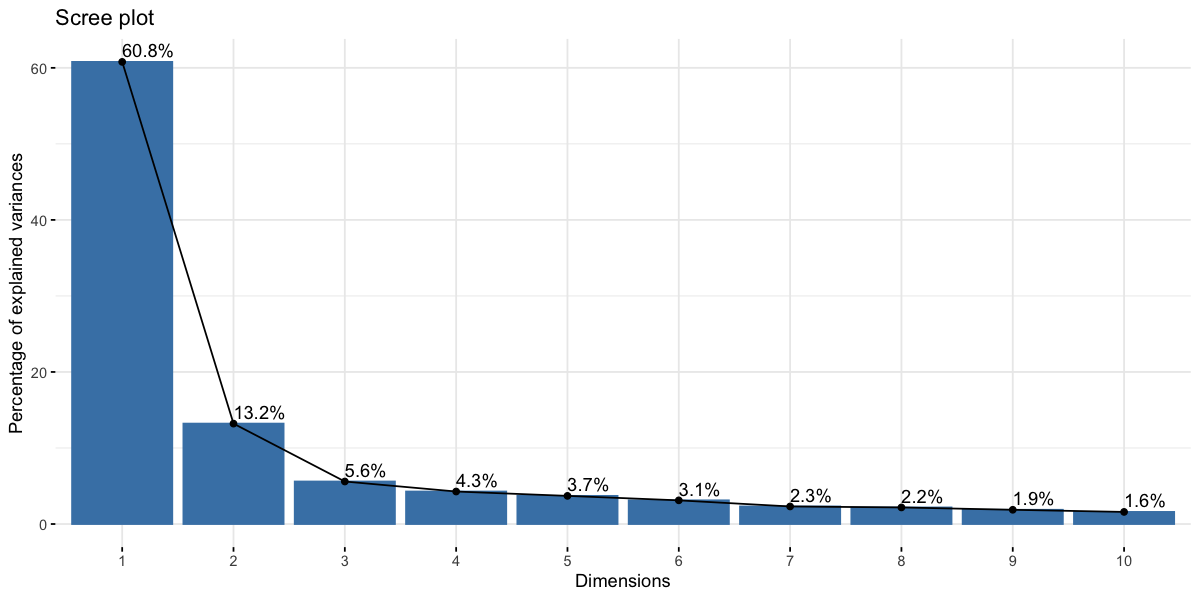

In [19]:
# running PCA
# unable to run pca on entire dataset, each treatment included different proteins creating missing data
pca = prcomp(pca_prep_df, scale = TRUE)

# viewing scree plots to see how much of the variance was captured in first 2 eigenvectors
options(repr.plot.width=10, repr.plot.height=5) #changing size
fviz_eig(pca, addlabels = TRUE)

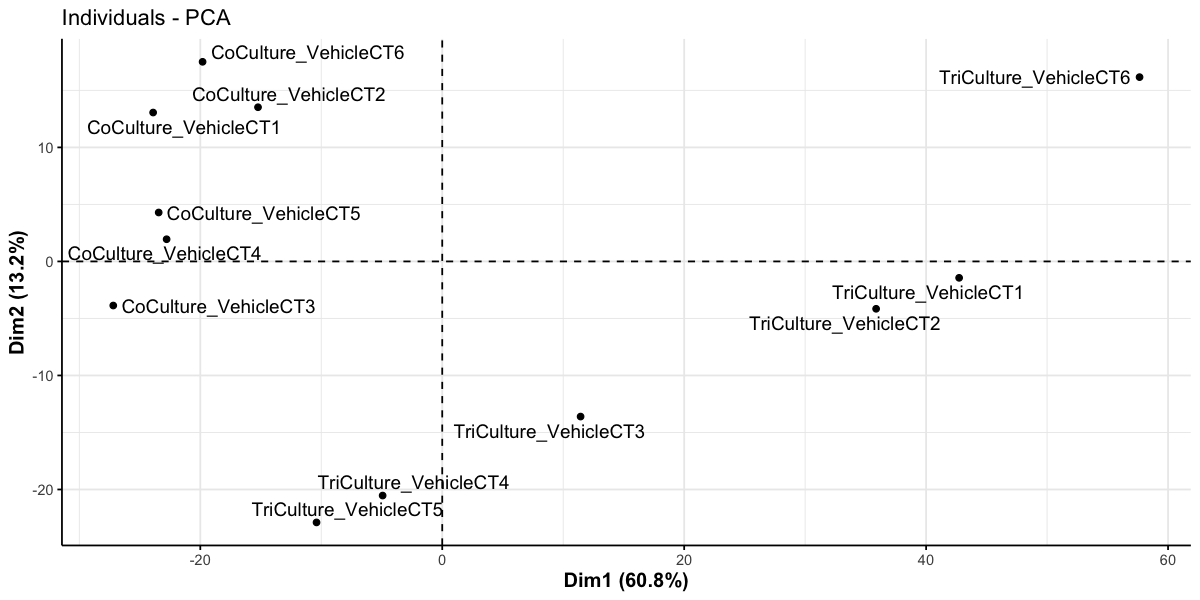

In [20]:
# visualizing all data to detect outliers
fviz_pca_ind(pca, 
             repel = TRUE) +
theme(axis.line = element_line(colour = "black"), #making x and y axes black
      legend.text = element_text(size = 8),
      axis.title = element_text(face = "bold", size = rel(1.1))) #changes axis titles

I'll use a formula to detect outliers rather than visual inspection, since there aren't any obvious outliers. 

The standard way to detect outliers in genetics is the criterion of being “more than 6 standard deviations away from the mean”. [source](https://privefl.github.io/blog/detecting-outlier-samples-in-pca/)

In [21]:
outlier_detection = function(pca_df){
    # """
    # Creating a scoring function for to detect PCA sample outliers. 
    # :param (input): PCA df (df)
    # :output: outlier names
    # """
    
    # getting scores
    scores = pca_df$x
    # identifying samples that are > 6 standard deviations away from the mean
    outlier_indices = apply(scores, 2, function(x) which( abs(x - mean(x)) > (6 * sd(x)) )) %>%
        Reduce(union, .)
    # getting sample names
    outliers = rownames(scores)[outlier_indices]
    
    return(outliers)
}

# calling fn
outliers = outlier_detection(pca)                        

In [22]:
# number of samples to be removed from this filter
length(outliers)

[1] 0

In [23]:
# removing those outliers (even though there were none)
`%notin%` <- Negate(`%in%`)

removed_outliers_df = final_imputed_df %>%
    filter(ID %notin% outliers)

In [24]:
# creating 1 final df with proteins that passed all filters and adding a col for log2 values
final_df = removed_outliers_df
final_df$log2Value = log2(final_df$Value)
head(final_df)

Set,Treatment,ID,Protein,Value,Treatment_Presence,log2Value
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P02769,538898561926,Both,38.97122
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P02751,192832712254,Both,37.48856
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P12763,266866699995,Both,37.95733
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,Q2UVX4,58194157805,Both,35.76016
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P98160,25911895708,Both,34.59290
Set1,CoCulture_Vehicle,CoCulture_VehicleCT1,P12111,13343334999,Both,33.63540


In [25]:
# final number of proteins for each treatment
final_df %>%
    group_by(Treatment) %>%
    summarize(`Final Number of Proteins` = length(unique(Protein)))

Treatment,Final Number of Proteins
<chr>,<int>
CoCulture_Vehicle,1451
TriCulture_Vehicle,1451


In [26]:
#exporting results
write.csv(final_df, paste0(Output,"/", cur_date, "_Imputed_Proteomics_Data.csv"), row.names = FALSE)